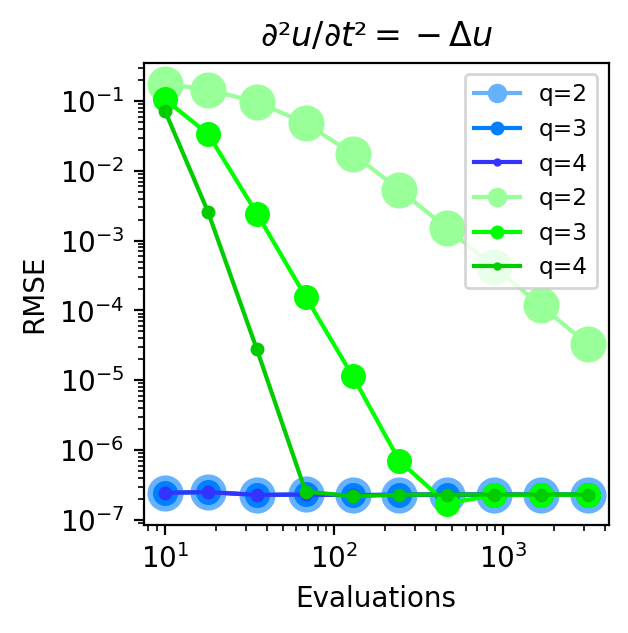

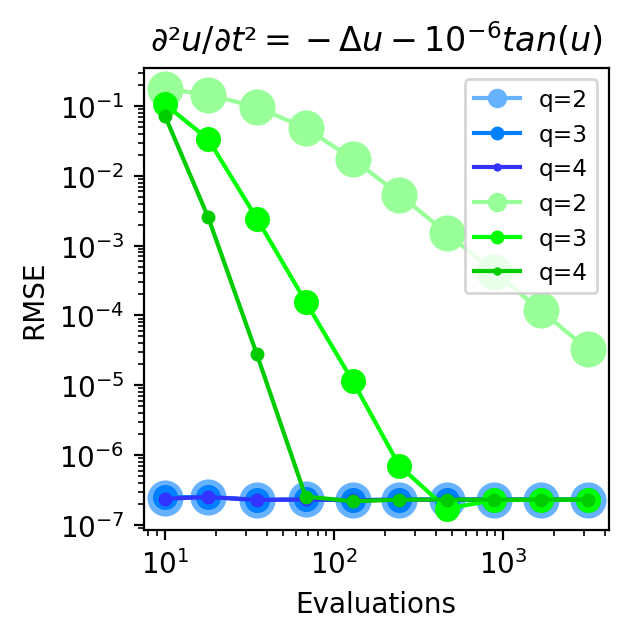

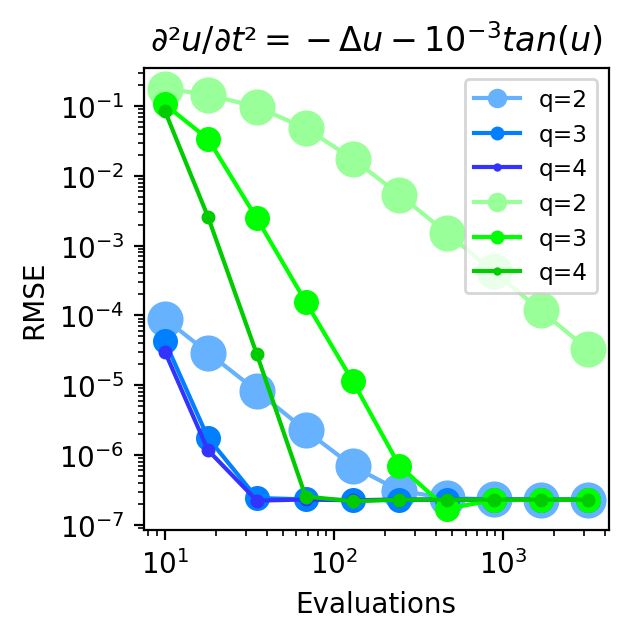

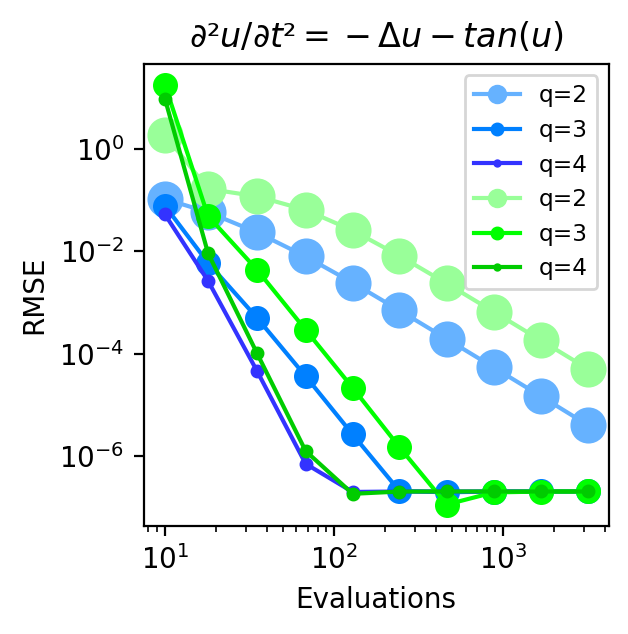

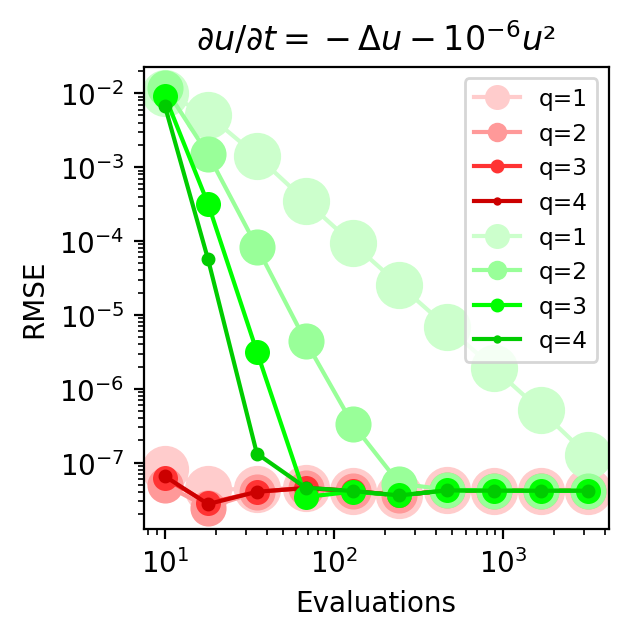

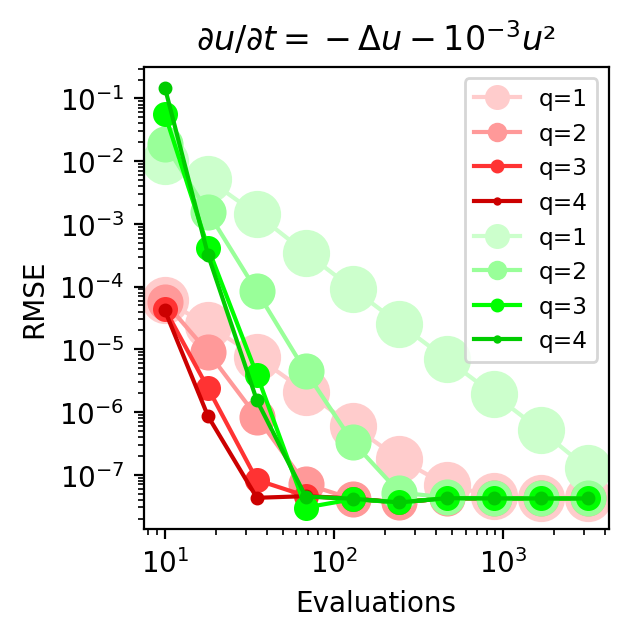

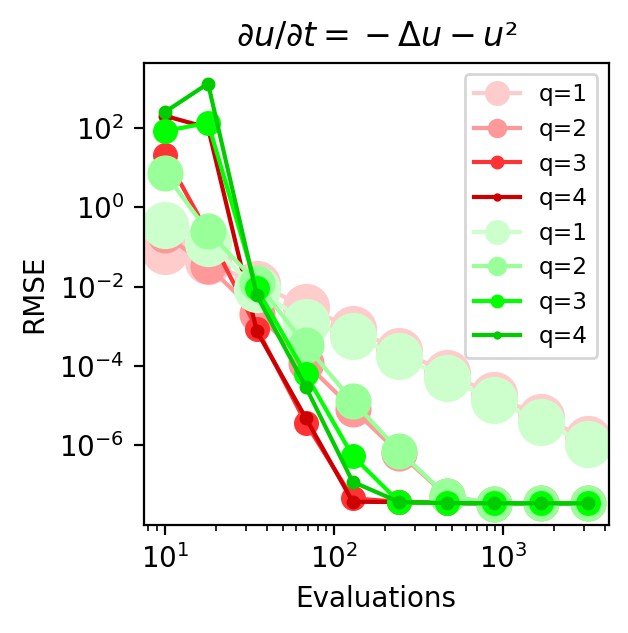

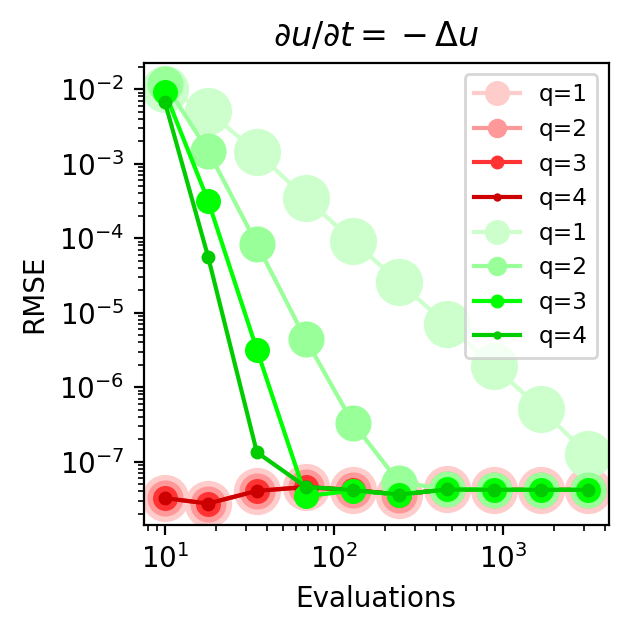

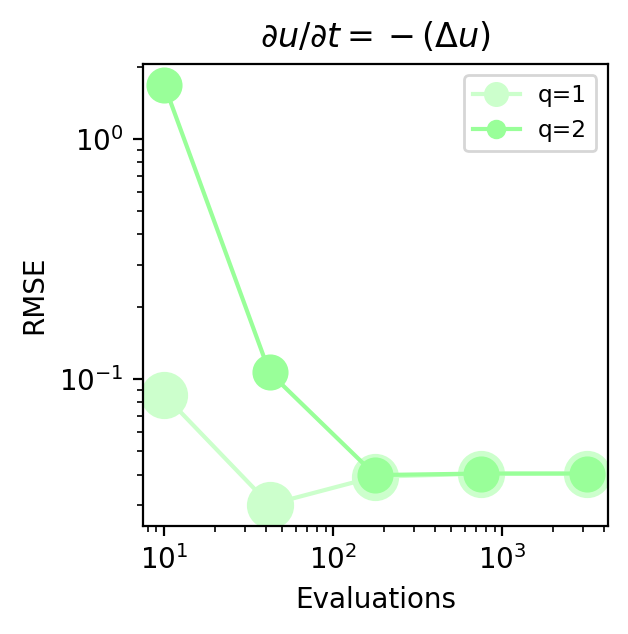

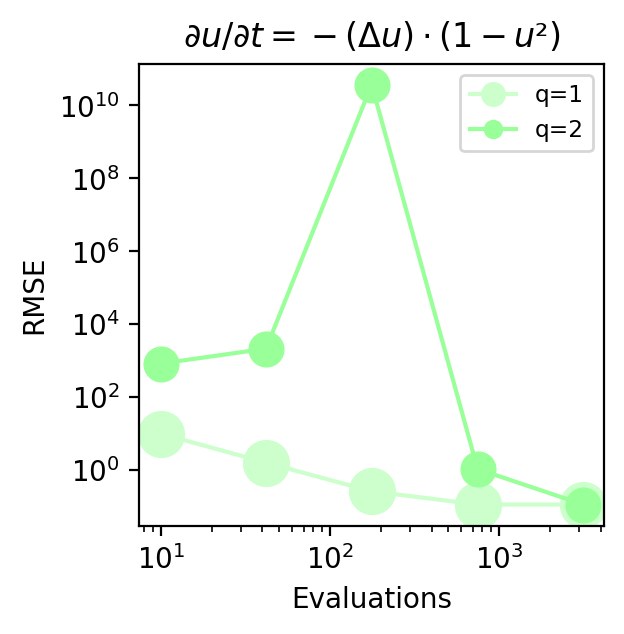

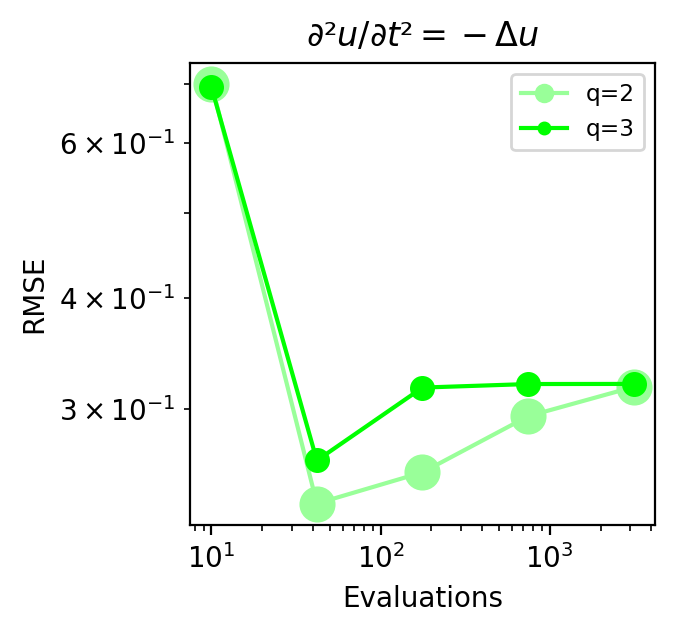

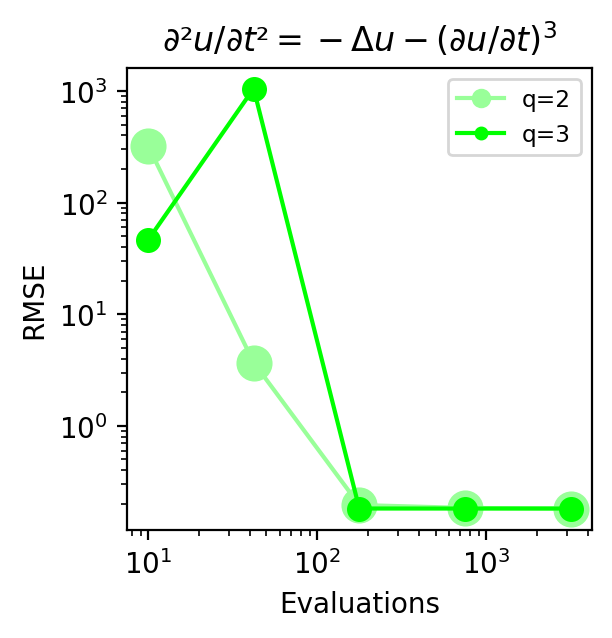

In [3]:
import jax.numpy as jnp
import shelve

from persistent_storage import (
    get_value,
    experiment_setup,
    build_experiment_name,
)
import itertools
from matplotlib import pyplot as plt


def hex_to_rgb(hex: str):
    return jnp.clip(
        jnp.array([int(hex[i : i + 2], 16) for i in (0, 2, 4)]) * 2 / 255, 0, 1
    ).tolist()


problem_names = list(experiment_setup.keys())
# problem_names = ["wave and big tan"]  # list(experiment_setup.keys())

for problem_name in problem_names:
    data = experiment_setup[problem_name]
    priors, prior_scales, derivatives, timesteps, problem_title, vf, order, domain = (
        data["priors"],
        data["prior_scale"],
        data["derivatives"],
        data["timesteps"],
        data["problem_title"],
        data["vector_field"],
        data["order"],
        data["domain"],
    )

    product = list(itertools.product(priors, derivatives, timesteps))
    fig, (ax) = plt.subplots(1, 1, dpi=200, figsize=(3, 3))

    # ax.set_title(problem_title + " on " + domain,)
    ax.set_title(problem_title)

    ax.set_ylabel("RMSE")
    ax.set_xlabel("Evaluations")

    def experiment_to_color(prior, q):
        if prior == "heat":
            return "#" + ["XX", "FFCCCC", "FF9999", "FF3333", "CC0000", "990000"][q]
        if prior == "iwp":
            return "#" + ["XX", "CCFFCC", "99FF99", "00FF00", "00CC00", "009900"][q]
        if prior == "wave":
            return "#" + ["XX", "XX", "66B2FF", "0080FF", "3333FF", "000099"][q]

    for prior, marker in zip(priors, ["o", "o"]):
        for q in derivatives:
            name = f"{'Heat' if prior == 'heat' else ('Wave' if prior == 'wave' else 'IWP')}-prior, q={q}"
            name = "q=" + str(q)
            time_rmse = []
            runtime_rmse = []
            for timestep in timesteps:
                experiment_name = build_experiment_name(prior, q, timestep)
                means, stds, runtime, rmse, diff = [None] * 5
                try:
                    with shelve.open("../dbs/" + problem_name, "r") as f:
                        if experiment_name in f:
                            means, stds, runtime, rmse, diff = f[experiment_name]
                    if means is None or jnp.isnan(means).any():
                        continue
                except Exception as e:
                    print(e)
                    continue
                time_rmse.append((timestep, rmse))
                runtime_rmse.append((runtime, rmse))

            ax.plot(
                *zip(*time_rmse),
                label=name,
                marker=marker,
                markersize=(2 * (10 - 2 * q)),
                color=experiment_to_color(prior, q),
            )

    if time_rmse:
        # ax legend but small:
        ax.legend(
            loc="upper right",
            fontsize="small",
            title_fontsize="small",
            markerscale=0.5,
            ncol=1,
        )
        ax.set_xscale("log")
        ax.set_yscale("log")

        fig.savefig(
            f"../markdown/latex/images/solver_{problem_name}.png",
            bbox_inches="tight",
            pad_inches=0.1,
            dpi=200,
            transparent=True,
        )


# Calibration

db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file doesn't exist; use 'c' or 'n' flag to create a new db
db file 

ValueError: zero-size array to reduction operation min which has no identity

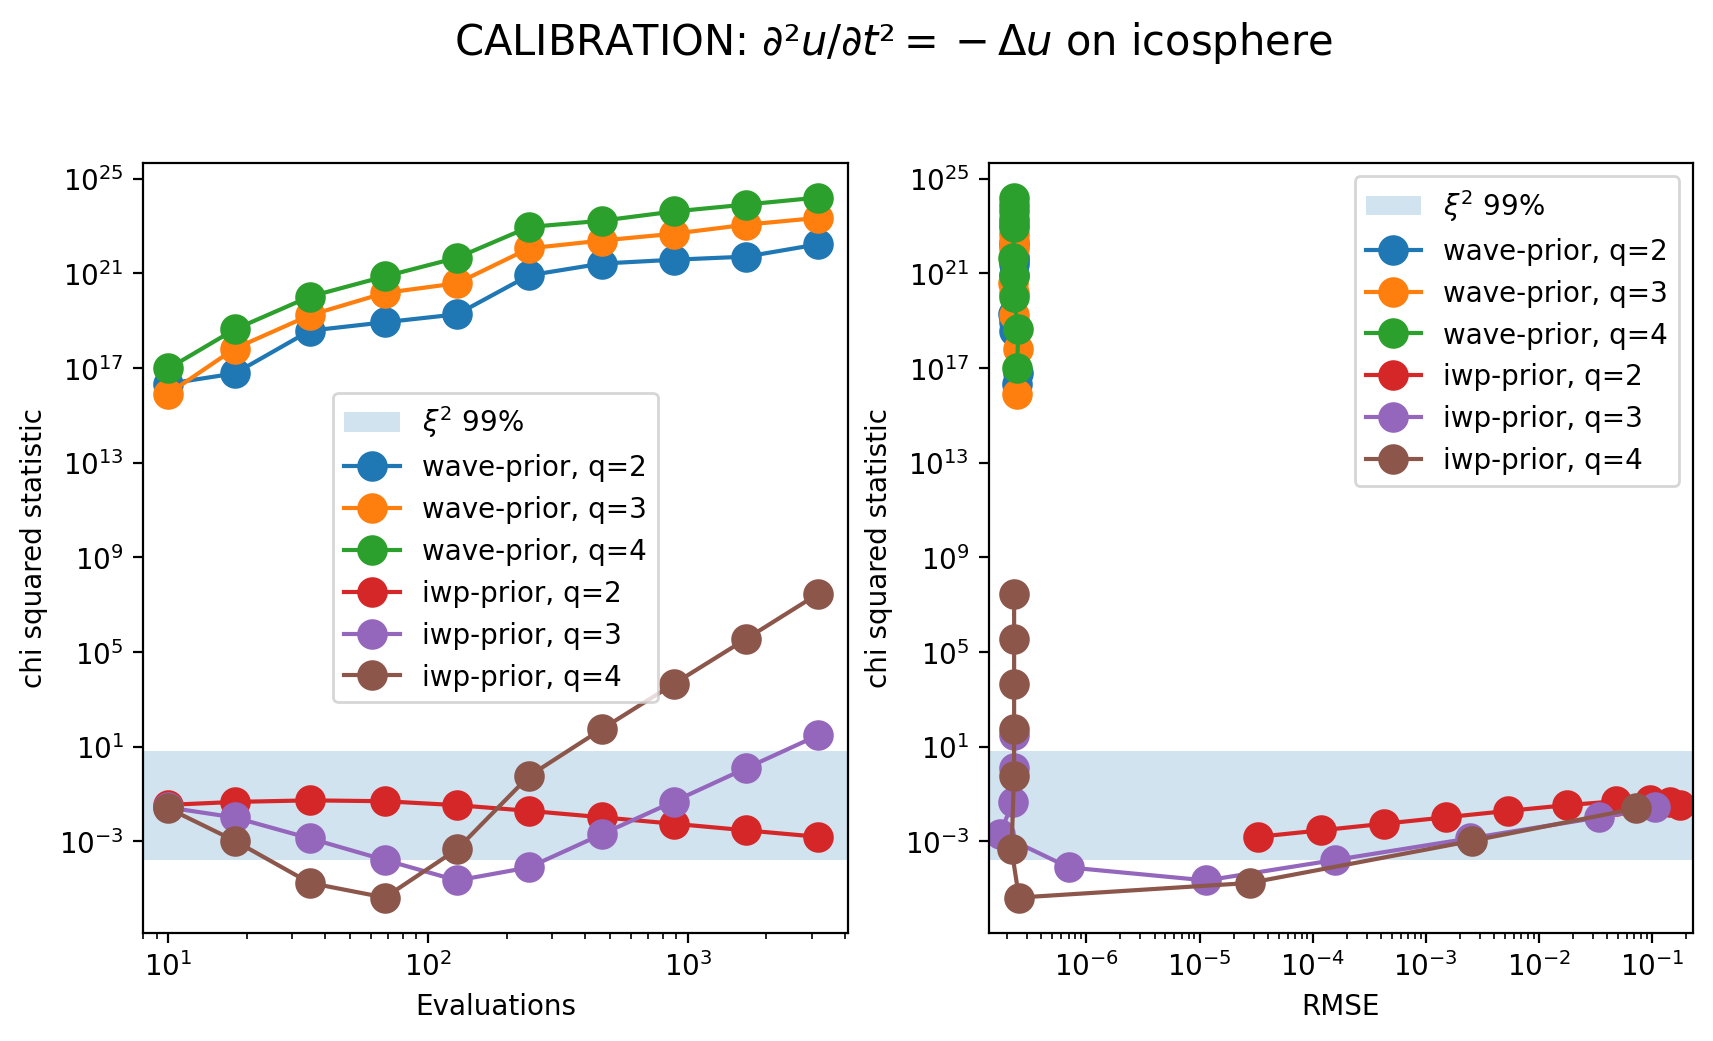

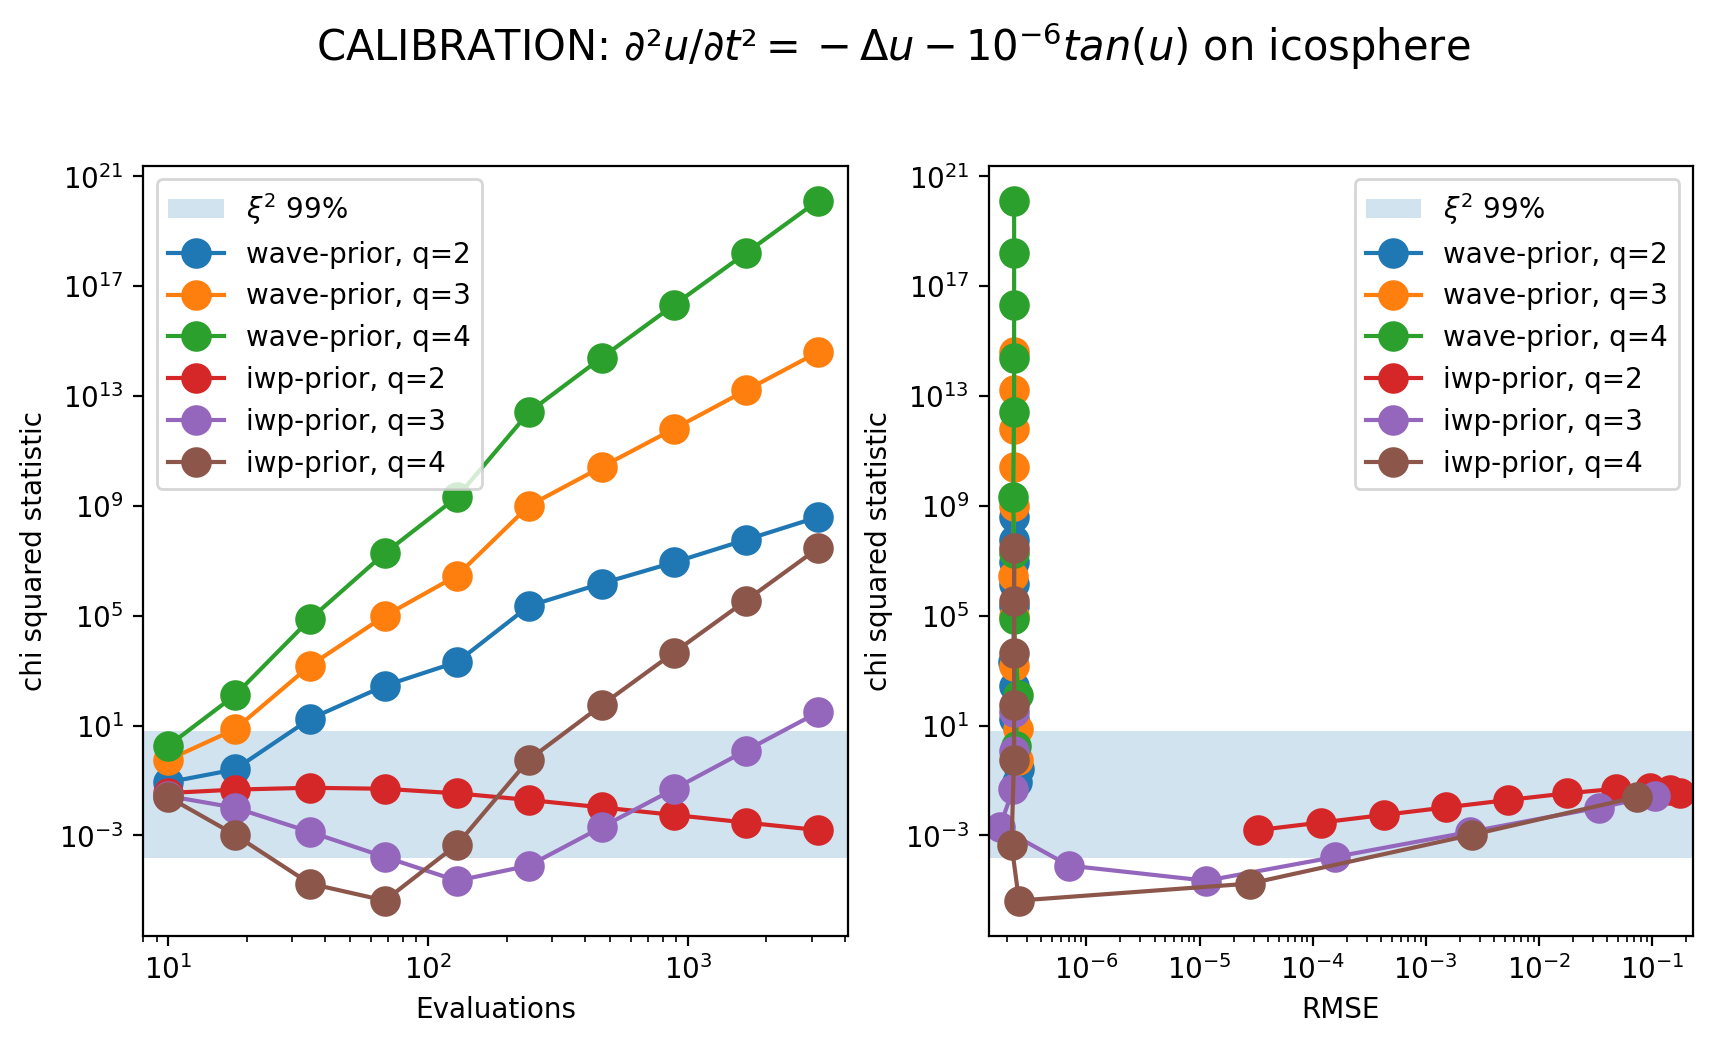

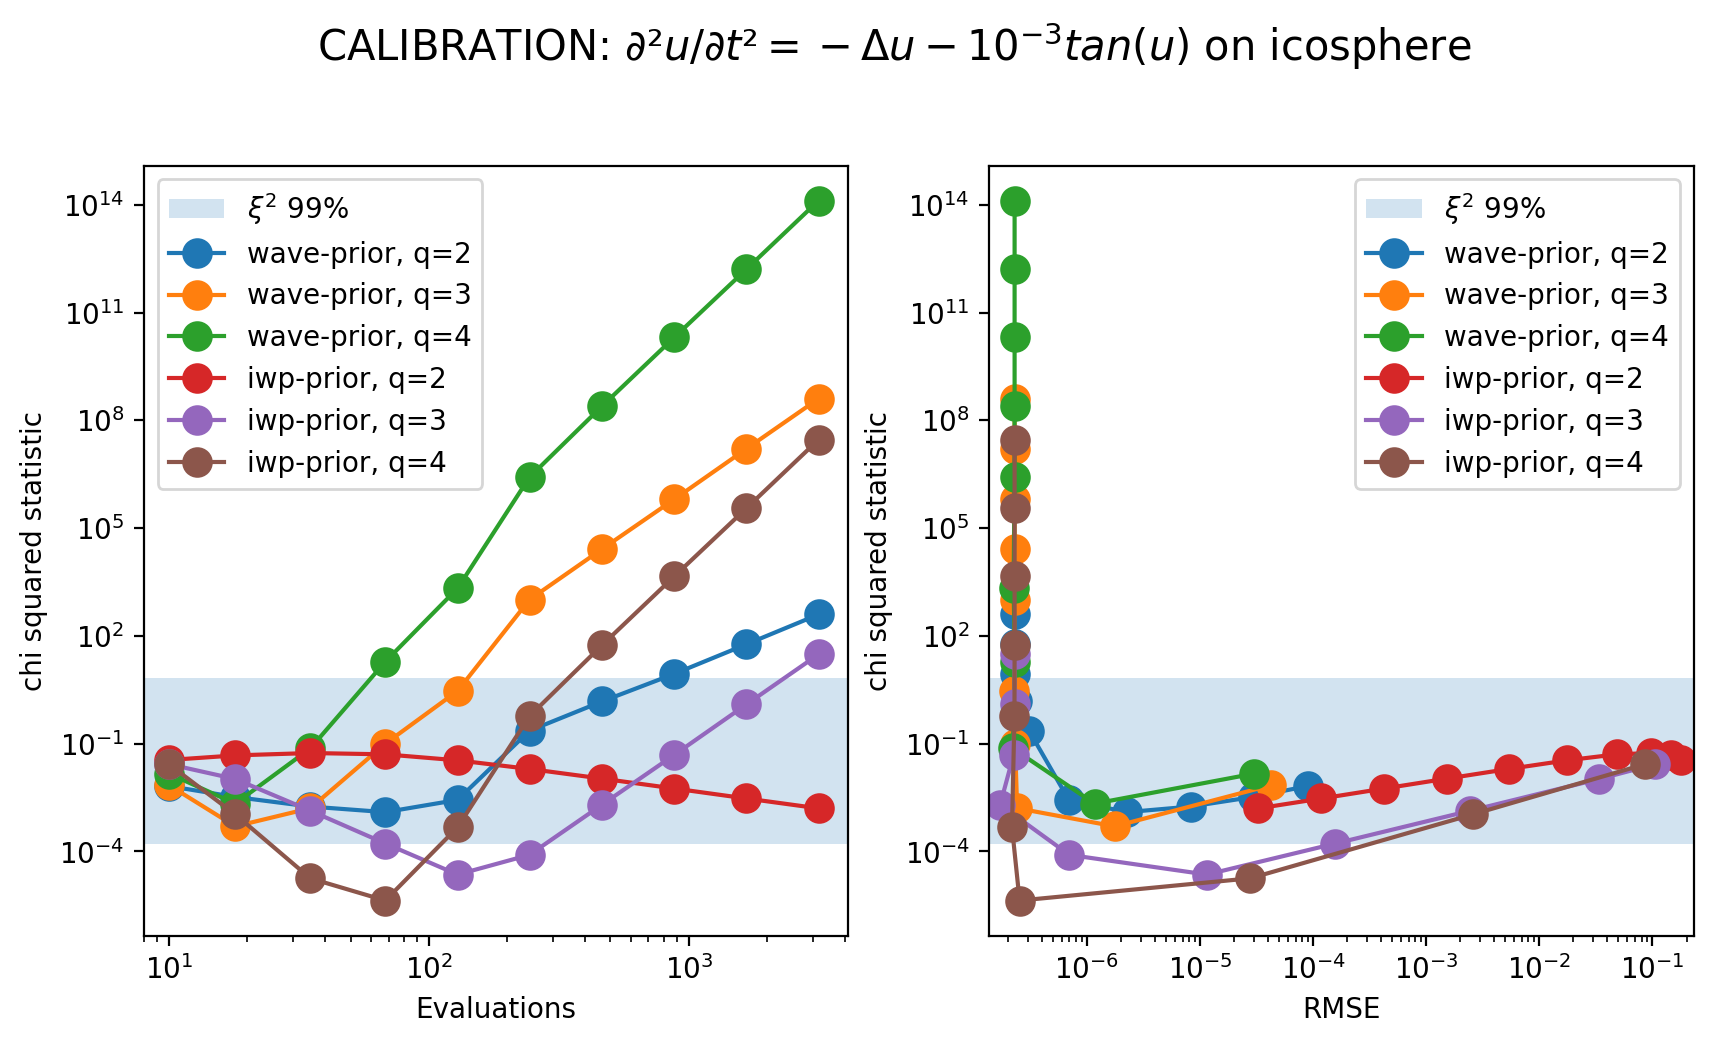

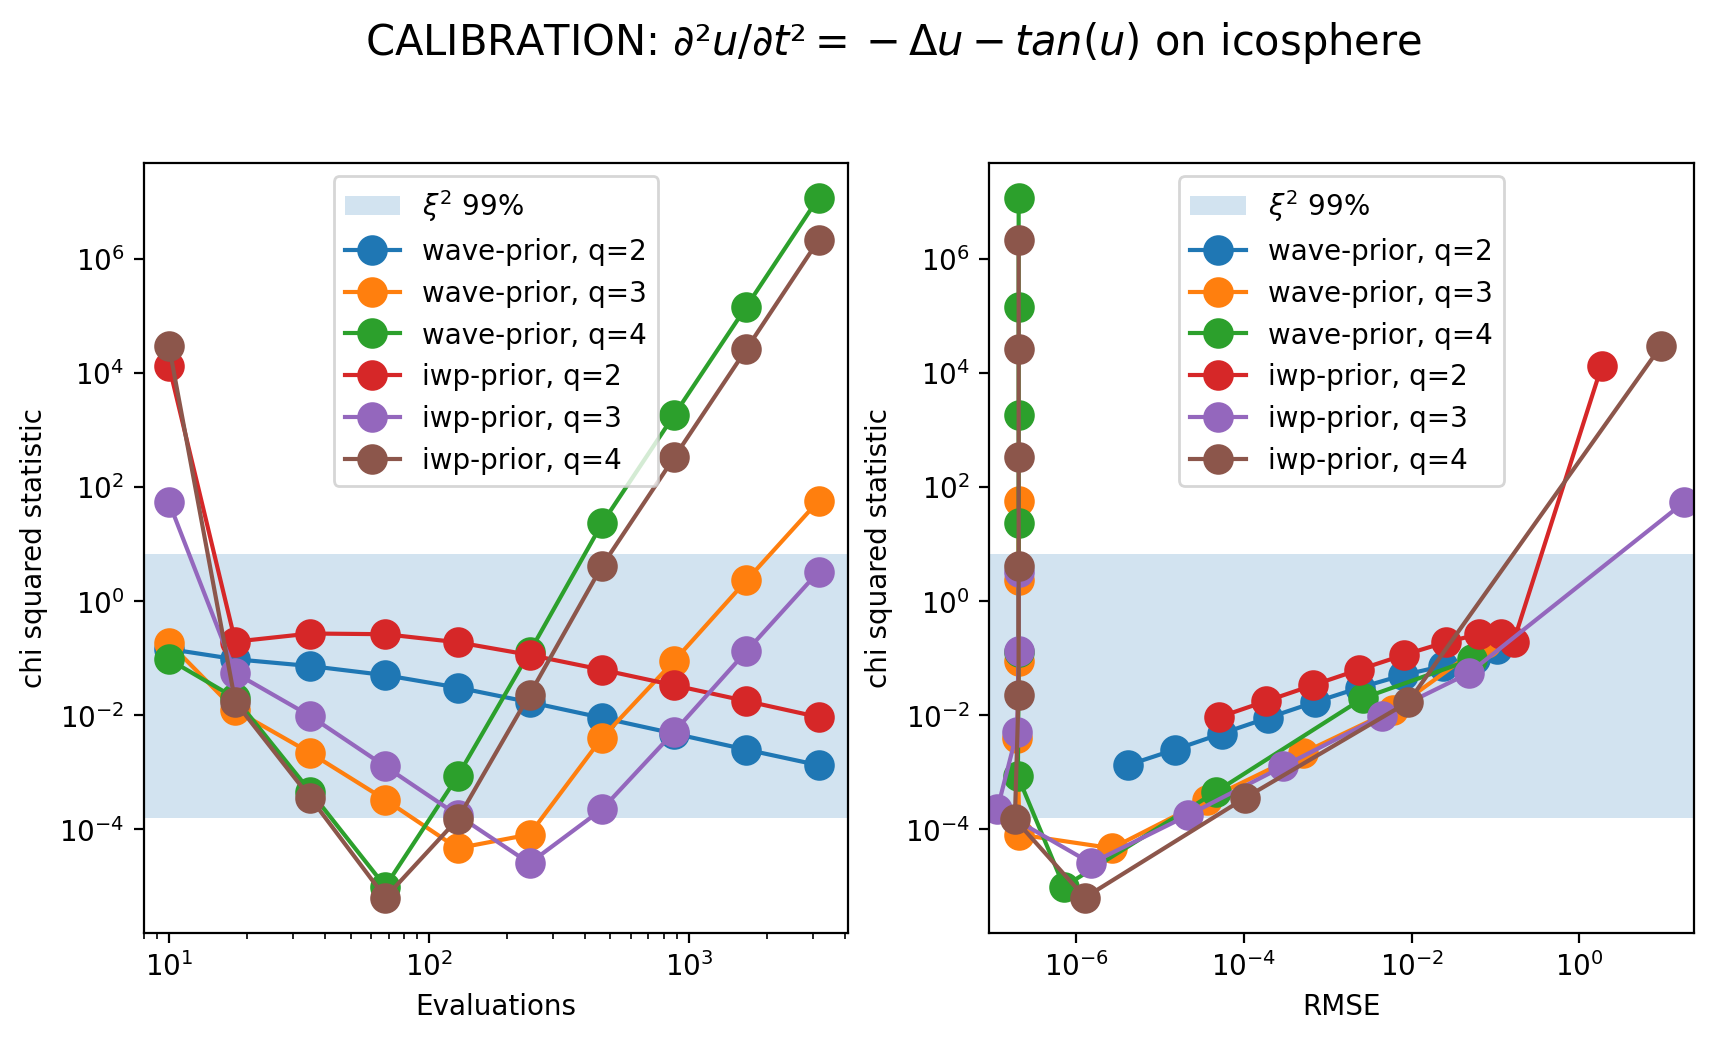

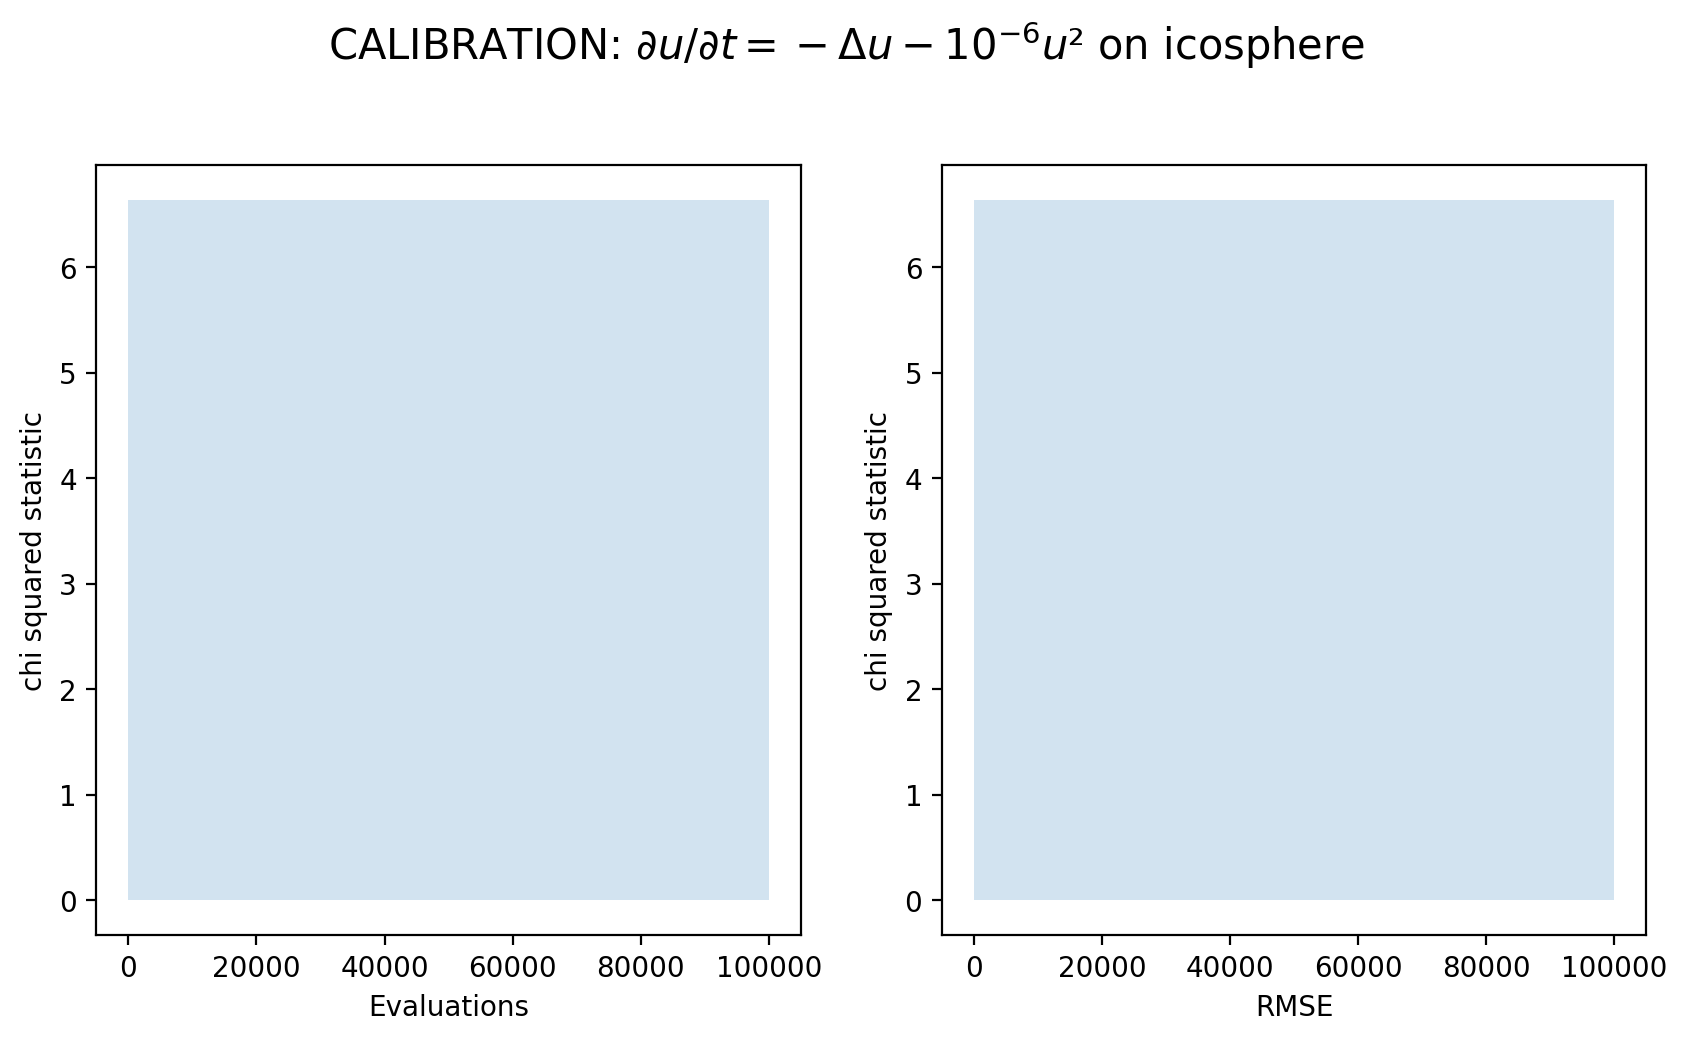

In [ ]:
import jax.numpy as jnp
import shelve

from persistent_storage import (
    get_value,
    experiment_setup,
    build_experiment_name,
)
import itertools
from matplotlib import pyplot as plt
import scipy.stats as stats


def hex_to_rgb(hex: str):
    return jnp.clip(
        jnp.array([int(hex[i : i + 2], 16) for i in (0, 2, 4)]) * 2 / 255, 0, 1
    ).tolist()


problem_names = list(experiment_setup.keys())
# problem_names = ["wave and big tan"]  # list(experiment_setup.keys())

for problem_name in problem_names:
    data = experiment_setup[problem_name]
    priors, prior_scales, derivatives, timesteps, problem_title, vf, order, domain = (
        data["priors"],
        data["prior_scale"],
        data["derivatives"],
        data["timesteps"],
        data["problem_title"],
        data["vector_field"],
        data["order"],
        data["domain"],
    )

    product = list(itertools.product(priors, derivatives, timesteps))
    # evalute chi squared statistic

    # precision / work plot
    fig, (eval_axis, rmse_axis) = plt.subplots(1, 2, dpi=200, figsize=(10, 5))

    fig.text(
        0.5,
        1,
        "CALIBRATION: " + problem_title + " on " + domain,
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=15,
    )

    eval_axis.set_ylabel("chi squared statistic")
    rmse_axis.set_ylabel("chi squared statistic")

    eval_axis.set_xlabel("Evaluations")
    rmse_axis.set_xlabel("RMSE")

    start = stats.chi2.ppf(0.01, df=1)
    end = stats.chi2.ppf(0.99, df=1)
    eval_axis.fill_between(
        [0, 1e5], [start, start], [end, end], alpha=0.2, label=r"$\xi^2$ 99%"
    )
    rmse_axis.fill_between(
        [0, 1e5], [start, start], [end, end], alpha=0.2, label=r"$\xi^2$ 99%"
    )

    all_rmses = []
    all_timesteps = []
    for prior in priors:
        name = f"{prior}"
        for q in derivatives:
            chi_rmse_q_time = []

            for timestep in timesteps:
                experiment_name = build_experiment_name(prior, q, timestep)
                means, stds, runtime, rmse, diff = [None] * 5
                try:
                    with shelve.open("../dbs/" + problem_name, "r") as f:
                        if experiment_name in f:
                            means, stds, runtime, rmse, diff = f[experiment_name]
                    if means is None or jnp.isnan(means).any():
                        continue
                except Exception as e:
                    print(e)
                    continue

                stat = jnp.mean((diff[1:-1] / stds[1:-1]) ** 2)

                chi_rmse_q_time.append((stat, rmse, q, timestep))  #  * (timestep)
                all_rmses.append(rmse)
                all_timesteps.append(timestep)

            if chi_rmse_q_time == []:
                continue

            last_plot_color = eval_axis.plot(
                [timestep for (_, rmse, _, timestep) in chi_rmse_q_time],
                [(chi) for (chi, _, _, _) in chi_rmse_q_time],
                label=f"{name}-prior, q={q}",
                marker="o",
                markersize=10,
            )[-1].get_color()

            last_plot_color = rmse_axis.plot(
                [rmse for (_, rmse, _, _) in chi_rmse_q_time],
                [(chi) for (chi, _, _, _) in chi_rmse_q_time],
                label=f"{name}-prior, q={q}",
                marker="o",
                markersize=10,
            )[-1].get_color()

    rmse_axis.set_xlim(
        jnp.min(jnp.array(all_rmses)) * 0.8, jnp.max(jnp.array(all_rmses)) * 1.3
    )
    eval_axis.set_xlim(
        jnp.min(jnp.array(all_timesteps)) * 0.8, jnp.max(jnp.array(all_timesteps)) * 1.3
    )
    eval_axis.legend()
    rmse_axis.legend()
    eval_axis.set_yscale("log")
    rmse_axis.set_yscale("log")
    eval_axis.set_xscale("log")
    rmse_axis.set_xscale("log")